In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DataSets/Realty_Dataset.csv')

In [3]:
df.head()

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           1500 non-null   int64  
 1   location              1500 non-null   object 
 2   property_type         1500 non-null   object 
 3   size_sqft             1500 non-null   int64  
 4   num_bedrooms          1500 non-null   int64  
 5   num_bathrooms         1500 non-null   int64  
 6   floor_number          1500 non-null   int64  
 7   total_floors          1500 non-null   int64  
 8   age_years             1500 non-null   int64  
 9   furnishing            1500 non-null   object 
 10  amenities             1500 non-null   object 
 11  distance_to_metro_km  1500 non-null   float64
 12  view_score            1500 non-null   int64  
 13  date_listed           1500 non-null   object 
 14  price                 1500 non-null   int64  
dtypes: float64(1), int64(

In [5]:
df.isna().sum()

property_id             0
location                0
property_type           0
size_sqft               0
num_bedrooms            0
num_bathrooms           0
floor_number            0
total_floors            0
age_years               0
furnishing              0
amenities               0
distance_to_metro_km    0
view_score              0
date_listed             0
price                   0
dtype: int64

In [6]:
df.describe()

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,distance_to_metro_km,view_score,price
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,750.500000,2675.685333,3.040667,2.483333,15.065333,21.878000,14.224000,5.148787,2.946000,4.567594e+07
std,433.157015,1344.269228,1.415750,1.120071,8.419520,10.085646,8.579913,2.820607,1.399186,2.720719e+07
min,1.000000,351.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.110000,1.000000,2.384000e+06
25%,375.750000,1507.250000,2.000000,1.000000,8.000000,13.000000,7.000000,2.750000,2.000000,2.502275e+07
50%,750.500000,2668.500000,3.000000,2.000000,15.000000,22.000000,14.000000,5.240000,3.000000,4.146500e+07
75%,1125.250000,3854.750000,4.000000,3.000000,22.000000,31.000000,21.000000,7.580000,4.000000,5.876725e+07
max,1500.000000,4997.000000,5.000000,4.000000,29.000000,39.000000,29.000000,10.000000,5.000000,1.335480e+08


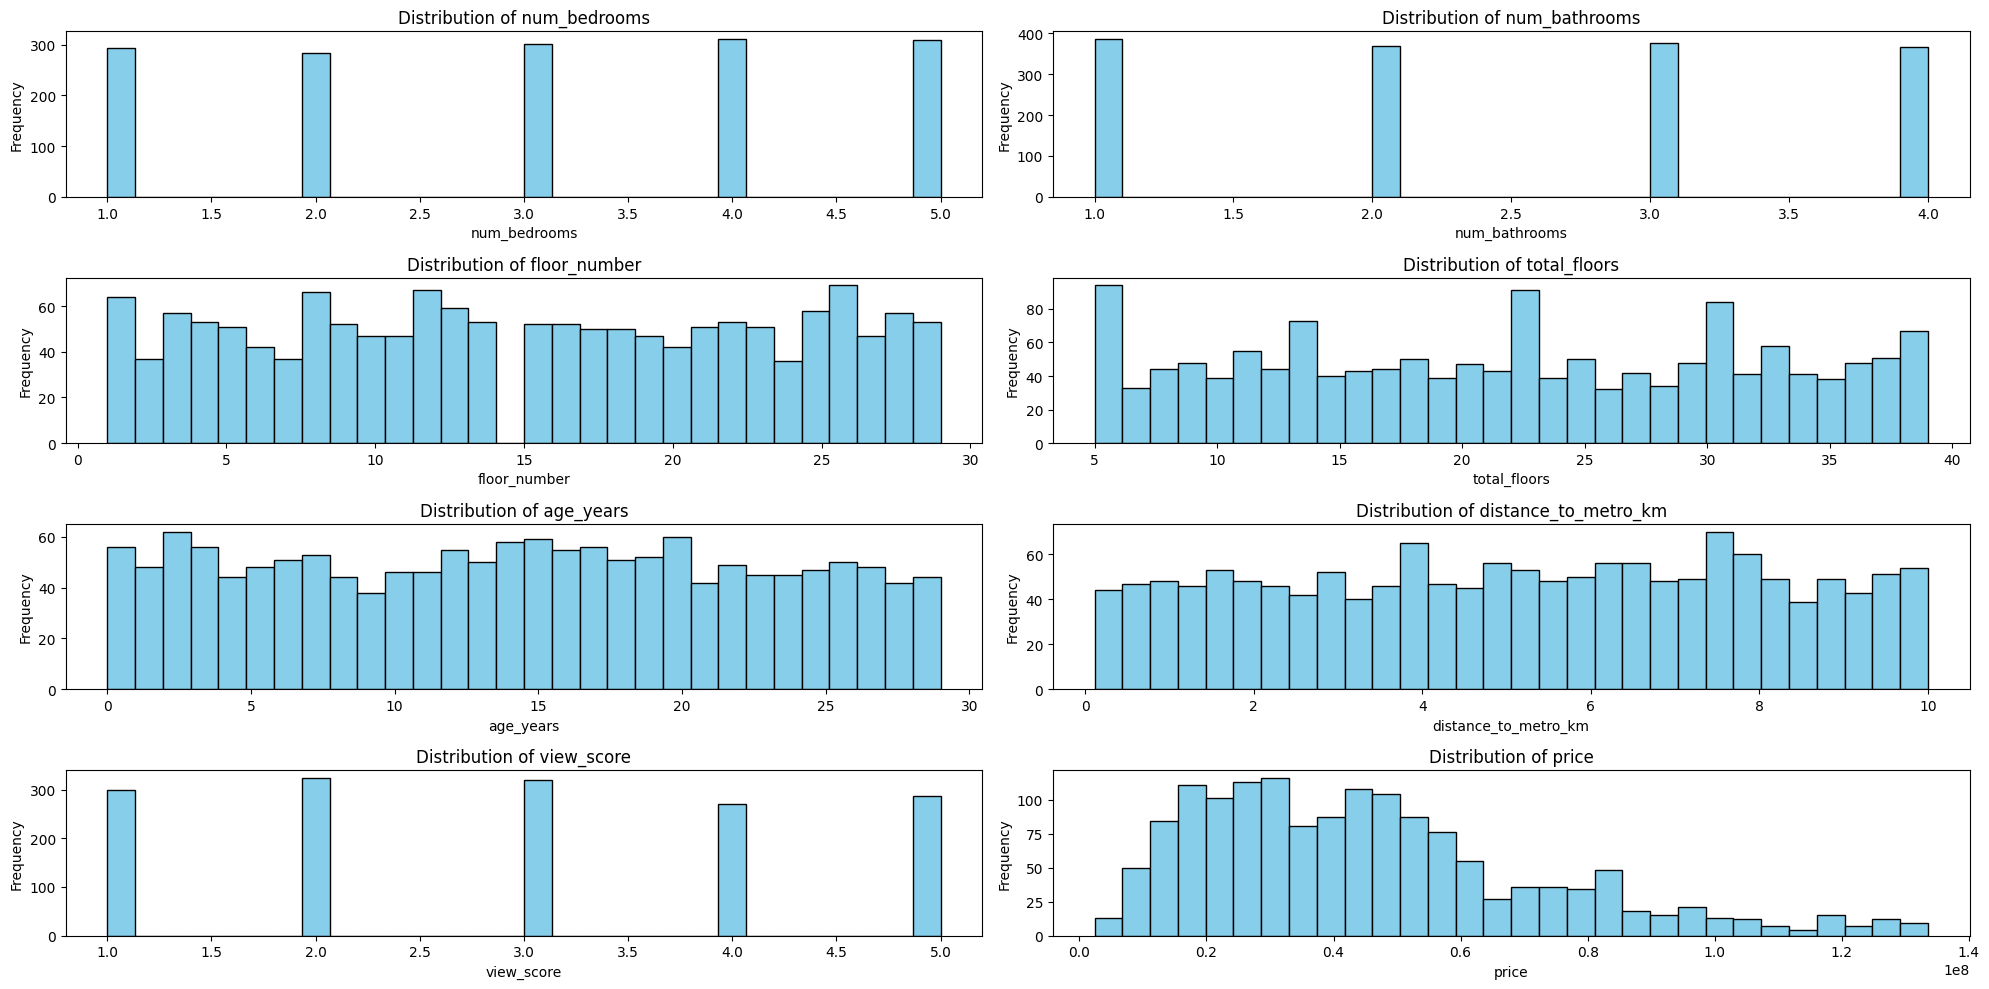

In [7]:
column_names = ['num_bedrooms', 'num_bathrooms', 'floor_number', 'total_floors', 'age_years', 'distance_to_metro_km', 'view_score', 'price']

fig, ax = plt.subplots(4, 2, figsize = (20, 10))
axes = ax.flatten()

for i, column in enumerate(column_names):
    axes[i].hist(df[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

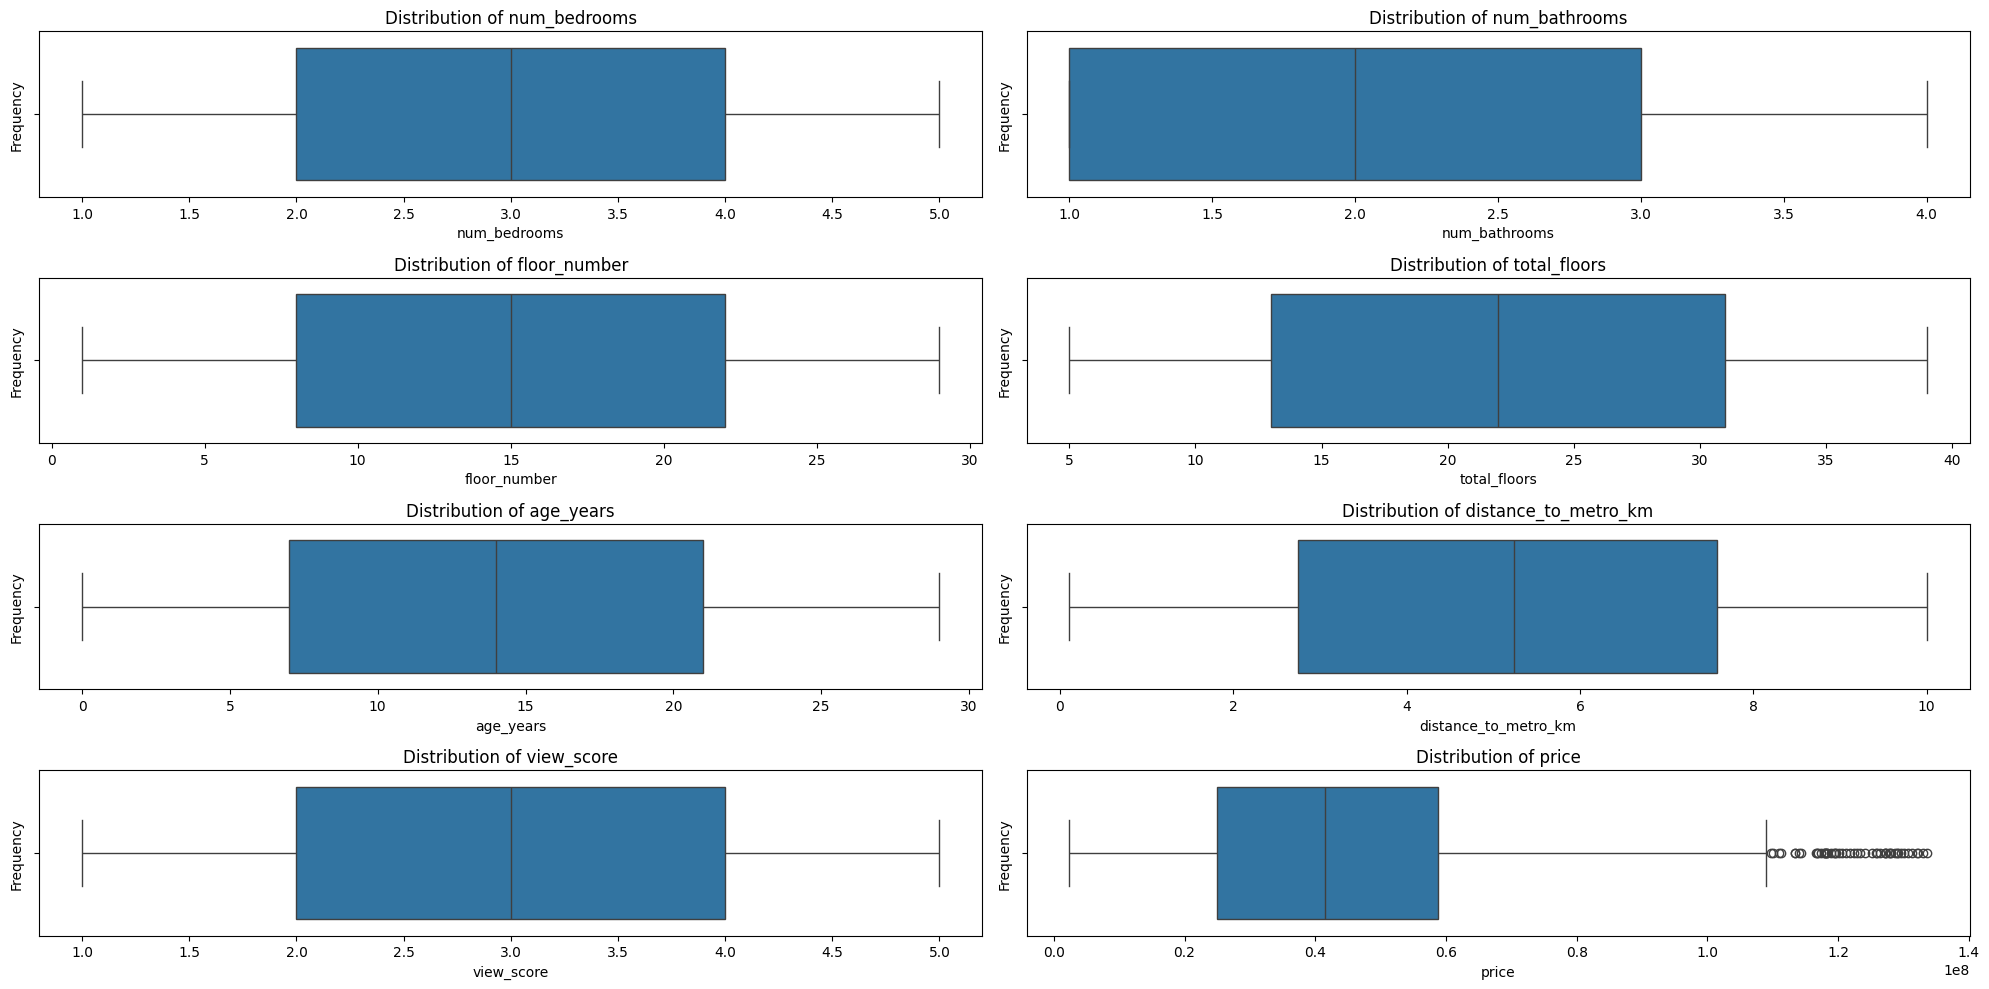

In [8]:
column_names = ['num_bedrooms', 'num_bathrooms', 'floor_number', 'total_floors', 'age_years', 'distance_to_metro_km', 'view_score', 'price']

fig, ax = plt.subplots(4, 2, figsize = (20, 10))
axes = ax.flatten()

for i, column in enumerate(column_names):
    sns.boxplot(x = df[column], ax = axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
df['price'].skew()

np.float64(0.9616196871655859)

In [10]:
from scipy.stats import zscore

df['zscore'] = zscore(df['price'])

df

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000,0.221010
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000,0.028019
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000,-0.824503
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000,-1.200081
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000,-0.364729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,Bangalore,Studio,1744,4,1,22,24,25,Unfurnished,lift,1.20,1,04-02-2024,29466000,-0.595995
1496,1497,Bangalore,Apartment,1969,1,4,28,39,20,Unfurnished,"pool,lift",5.34,4,05-02-2024,35419000,-0.377119
1497,1498,Chennai,Apartment,2702,3,4,7,27,15,Unfurnished,"clubhouse,parking",6.60,3,06-02-2024,37897000,-0.286010
1498,1499,Pune,Penthouse,4086,4,4,5,24,19,Unfurnished,clubhouse,0.52,2,07-02-2024,47235000,0.057322


In [11]:
df[df['zscore'] > 3]

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore
19,20,Mumbai,Apartment,4693,5,4,26,28,10,Fully Furnished,"parking,garden",7.40,5,20-01-2020,129189000,3.070545
208,209,Mumbai,Apartment,4904,2,3,6,23,15,Semi-Furnished,"gym,clubhouse",5.59,1,27-07-2020,132157000,3.179670
224,225,Mumbai,Apartment,4917,1,2,1,39,0,Unfurnished,"lift,clubhouse,security,pool,garden,gym",8.85,3,12-08-2020,129614000,3.086171
492,493,Mumbai,Apartment,4943,4,4,1,24,0,Semi-Furnished,"security,pool,gym,parking,clubhouse",3.13,2,07-05-2021,132982000,3.210003
559,560,Mumbai,Apartment,4770,3,4,25,10,29,Fully Furnished,"pool,security",0.82,3,13-07-2021,127375000,3.003849
784,785,Mumbai,Villa,4953,2,4,1,36,3,Fully Furnished,"parking,lift,security,gym,clubhouse,garden",4.44,1,23-02-2022,133548000,3.230814
794,795,Mumbai,Villa,4680,5,4,16,5,2,Fully Furnished,"clubhouse,parking,pool,gym",1.35,2,05-03-2022,128975000,3.062677
916,917,Mumbai,Apartment,4649,4,3,26,22,20,Unfurnished,"security,garden,parking,gym",2.41,4,05-07-2022,128724000,3.053448
1015,1016,Mumbai,Apartment,4812,2,2,4,35,14,Fully Furnished,"gym,security,pool",7.83,4,12-10-2022,130082000,3.103378
1127,1128,Mumbai,Apartment,4769,3,1,15,18,27,Fully Furnished,"garden,security,parking,gym,lift,pool,clubhouse",2.99,1,01-02-2023,127784000,3.018887


In [12]:
df[df['zscore'] > 3].shape

(15, 16)

In [13]:
df[df['zscore'] < -3]

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore


In [14]:
q1 = np.percentile(df['price'], 25)

print(f' q1 = {q1}')

q3 = np.percentile(df['price'], 75)

print(f' q3 = {q3}')

iqr = q3-q1

print(f' iqr = {iqr}')

 q1 = 25022750.0
 q3 = 58767250.0
 iqr = 33744500.0


In [15]:
col = ['num_bedrooms', 'num_bathrooms', 'floor_number', 'total_floors', 'age_years', 'distance_to_metro_km', 'view_score', 'price']

def outliers(df, column_names):

    outlier_records = {}

    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_records[column] = outlier

    return(outlier_records)

out = outliers(df, col)

out

{'num_bedrooms': Empty DataFrame
 Columns: [property_id, location, property_type, size_sqft, num_bedrooms, num_bathrooms, floor_number, total_floors, age_years, furnishing, amenities, distance_to_metro_km, view_score, date_listed, price, zscore]
 Index: [],
 'num_bathrooms': Empty DataFrame
 Columns: [property_id, location, property_type, size_sqft, num_bedrooms, num_bathrooms, floor_number, total_floors, age_years, furnishing, amenities, distance_to_metro_km, view_score, date_listed, price, zscore]
 Index: [],
 'floor_number': Empty DataFrame
 Columns: [property_id, location, property_type, size_sqft, num_bedrooms, num_bathrooms, floor_number, total_floors, age_years, furnishing, amenities, distance_to_metro_km, view_score, date_listed, price, zscore]
 Index: [],
 'total_floors': Empty DataFrame
 Columns: [property_id, location, property_type, size_sqft, num_bedrooms, num_bathrooms, floor_number, total_floors, age_years, furnishing, amenities, distance_to_metro_km, view_score, date_li

In [16]:
out['price']

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore
14,15,Mumbai,Apartment,4475,2,2,28,27,27,Unfurnished,parking,2.15,3,15-01-2020,114085000,2.515213
19,20,Mumbai,Apartment,4693,5,4,26,28,10,Fully Furnished,"parking,garden",7.40,5,20-01-2020,129189000,3.070545
28,29,Mumbai,Apartment,4145,3,3,8,9,26,Fully Furnished,parking,0.65,4,29-01-2020,111255000,2.411161
46,47,Mumbai,Apartment,4420,5,3,3,28,24,Fully Furnished,"security,garden,clubhouse,pool,parking,gym,lift",0.16,1,16-02-2020,120085000,2.735816
150,151,Mumbai,Villa,4306,4,3,8,23,18,Fully Furnished,"pool,parking,security,clubhouse,lift,garden,gym",6.45,2,30-05-2020,118301000,2.670223
165,166,Mumbai,Apartment,4482,2,4,13,20,2,Unfurnished,garden,3.51,3,14-06-2020,117827000,2.652796
208,209,Mumbai,Apartment,4904,2,3,6,23,15,Semi-Furnished,"gym,clubhouse",5.59,1,27-07-2020,132157000,3.179670
224,225,Mumbai,Apartment,4917,1,2,1,39,0,Unfurnished,"lift,clubhouse,security,pool,garden,gym",8.85,3,12-08-2020,129614000,3.086171
237,238,Mumbai,Apartment,4574,2,1,11,26,16,Unfurnished,"clubhouse,lift,garden",1.76,3,25-08-2020,117402000,2.637170
251,252,Mumbai,Apartment,4509,5,4,22,7,4,Fully Furnished,parking,4.48,5,08-09-2020,121247000,2.778540


In [17]:
out['price'].value_counts()

property_id  location  property_type  size_sqft  num_bedrooms  num_bathrooms  floor_number  total_floors  age_years  furnishing       amenities                                        distance_to_metro_km  view_score  date_listed  price      zscore  
15           Mumbai    Apartment      4475       2             2              28            27            27         Unfurnished      parking                                          2.15                  3           15-01-2020   114085000  2.515213    1
1074         Mumbai    Apartment      4224       5             4              22            38            3          Fully Furnished  clubhouse,parking                                2.47                  4           09-12-2022   116998000  2.622316    1
785          Mumbai    Villa          4953       2             4              1             36            3          Fully Furnished  parking,lift,security,gym,clubhouse,garden       4.44                  1           23-02-2022   133548000 

In [18]:
out['price'].shape

(51, 16)

In [19]:
(out['price']['zscore'] > 3).sum()

np.int64(15)

In [20]:
df[df['price'] > 58767250]

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore
6,7,Chennai,Apartment,4533,1,1,7,17,18,Semi-Furnished,"garden,lift,pool",5.71,5,07-01-2020,59315000,0.501471
11,12,Bangalore,Apartment,4992,4,2,8,9,11,Unfurnished,"parking,clubhouse,lift,security",7.82,1,12-01-2020,83777000,1.400871
13,14,Mumbai,Apartment,3076,2,4,10,27,12,Unfurnished,"security,pool,clubhouse",0.33,4,14-01-2020,81320000,1.310534
14,15,Mumbai,Apartment,4475,2,2,28,27,27,Unfurnished,parking,2.15,3,15-01-2020,114085000,2.515213
17,18,Delhi NCR,Apartment,3194,3,2,26,32,27,Fully Furnished,"pool,lift,security,garden,parking",1.66,3,18-01-2020,64261000,0.683321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1482,Delhi NCR,Apartment,3751,5,4,22,38,18,Fully Furnished,"parking,garden,security,pool",2.43,2,21-01-2024,72372000,0.981541
1485,1486,Bangalore,Apartment,4639,2,3,12,16,9,Unfurnished,"pool,lift,garden,clubhouse,parking",3.48,1,25-01-2024,73565000,1.025404
1487,1488,Mumbai,Apartment,3078,4,1,18,31,0,Unfurnished,"lift,parking,garden,gym,pool,security",6.88,4,27-01-2024,84849000,1.440286
1488,1489,Delhi NCR,Villa,4312,2,3,27,37,26,Fully Furnished,"clubhouse,garden,security",1.56,1,28-01-2024,87475000,1.536836


In [21]:
df['location'].unique()

array(['Delhi NCR', 'Chennai', 'Pune', 'Bangalore', 'Hyderabad', 'Mumbai'],
      dtype=object)

In [22]:
df[df['price'] > 58767250].location.unique()

array(['Chennai', 'Bangalore', 'Mumbai', 'Delhi NCR', 'Pune'],
      dtype=object)

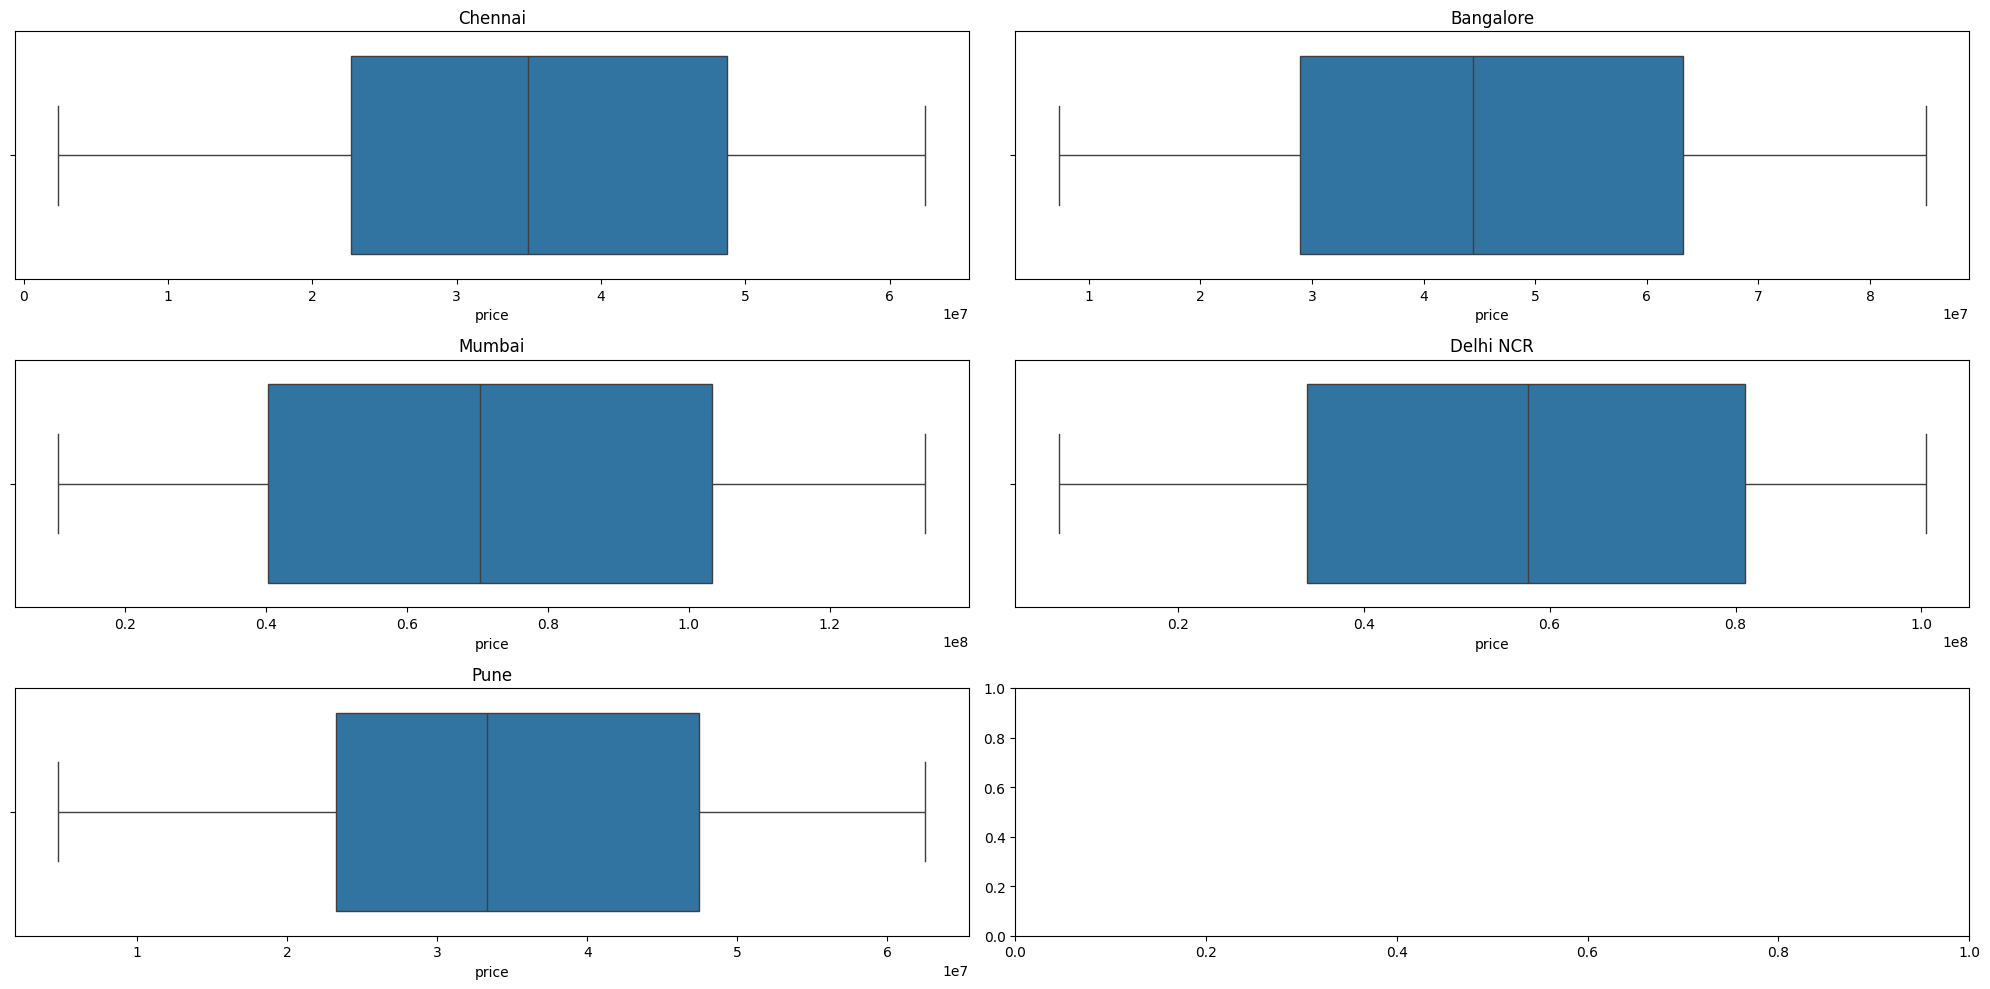

In [23]:
fig, ax = plt.subplots(3, 2, figsize = (20, 10))
locn = iter(df[df['price'] >= 58767250].location.unique())
for row in range(3):
    for col in range(2):        # 0 1
        try:
            l = next(locn)
            sns.boxplot(df[df['location'] == l], x = 'price', ax = ax[row, col])
            ax[row, col].set_title(l)
        except:
            break

plt.tight_layout()
plt.show()

In [24]:
df['price in crore'] = df['price'] / 10000000

df

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore,price in crore
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000,0.221010,5.1687
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000,0.028019,4.6438
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000,-0.824503,2.3251
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000,-1.200081,1.3036
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000,-0.364729,3.5756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,Bangalore,Studio,1744,4,1,22,24,25,Unfurnished,lift,1.20,1,04-02-2024,29466000,-0.595995,2.9466
1496,1497,Bangalore,Apartment,1969,1,4,28,39,20,Unfurnished,"pool,lift",5.34,4,05-02-2024,35419000,-0.377119,3.5419
1497,1498,Chennai,Apartment,2702,3,4,7,27,15,Unfurnished,"clubhouse,parking",6.60,3,06-02-2024,37897000,-0.286010,3.7897
1498,1499,Pune,Penthouse,4086,4,4,5,24,19,Unfurnished,clubhouse,0.52,2,07-02-2024,47235000,0.057322,4.7235


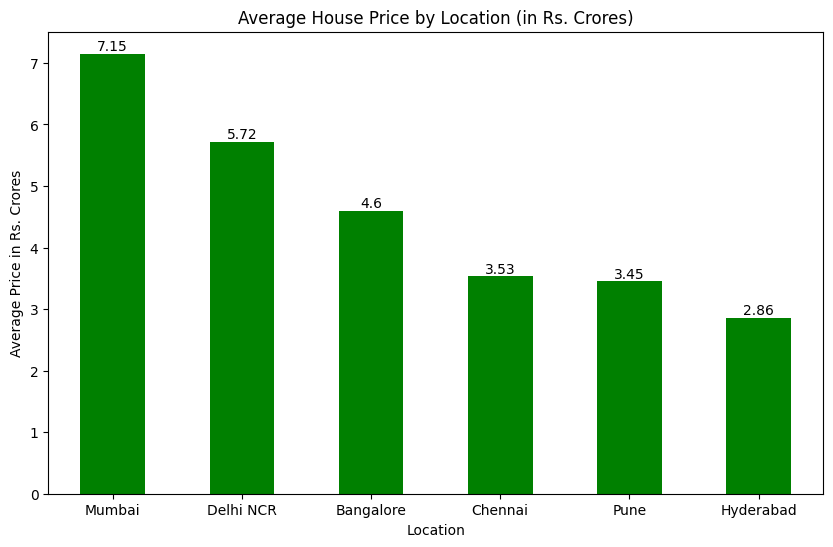

In [25]:
avg_house_price = df.groupby('location')['price in crore'].mean().sort_values(ascending = False).round(2)

ax = avg_house_price.plot(kind = 'bar', figsize=(10, 6), color='green')
plt.title('Average House Price by Location (in Rs. Crores)')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Location')
plt.xticks(rotation = 0)
plt.ylabel('Average Price in Rs. Crores')
plt.show()

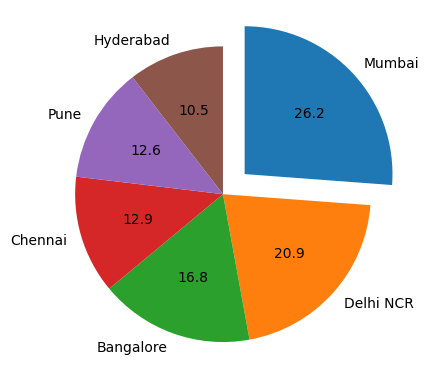

In [26]:
plt.pie(avg_house_price, labels=avg_house_price.index, explode = [0.2, 0, 0, 0, 0, 0], autopct = '%.1f', startangle=90, counterclock=False)

plt.show()

In [27]:
house_price = df.groupby('location')['price in crore'].aggregate(['sum', 'min', 'max', 'std', 'mean', 'count', 'var', 'median']).round(2)

house_price

,sum,min,max,std,mean,count,var,median
location,,,,,,,,
Bangalore,1183.04,0.73,8.50,2.12,4.60,257,4.49,4.44
Chennai,805.38,0.24,6.25,1.59,3.53,228,2.53,3.50
Delhi NCR,1413.65,0.72,10.05,2.61,5.72,247,6.80,5.77
Hyderabad,778.43,0.42,5.65,1.37,2.86,272,1.89,2.74
Mumbai,1852.43,1.05,13.35,3.57,7.15,259,12.75,7.04
Pune,818.46,0.47,6.25,1.46,3.45,237,2.14,3.33


In [28]:
house_age = df.groupby('location')['age_years'].aggregate(['sum', 'min', 'max', 'std', 'mean', 'count', 'var', 'median']).round(2)

house_age

,sum,min,max,std,mean,count,var,median
location,,,,,,,,
Bangalore,3450,0,29,8.51,13.42,257,72.48,13.0
Chennai,3271,0,29,8.80,14.35,228,77.49,15.0
Delhi NCR,3611,0,29,8.48,14.62,247,71.83,15.0
Hyderabad,4012,0,29,8.10,14.75,272,65.56,15.0
Mumbai,3678,0,29,9.03,14.20,259,81.51,15.0
Pune,3314,0,29,8.60,13.98,237,73.91,14.0


In [29]:
no_of_floors = df.groupby('location')['total_floors'].aggregate(['sum', 'min', 'max', 'std', 'mean', 'count', 'var', 'median']).round(2)

no_of_floors

,sum,min,max,std,mean,count,var,median
location,,,,,,,,
Bangalore,5580,5,39,10.15,21.71,257,102.98,21.0
Chennai,4858,5,39,9.93,21.31,228,98.65,20.0
Delhi NCR,5453,5,39,10.15,22.08,247,102.95,23.0
Hyderabad,5889,5,39,10.52,21.65,272,110.72,22.0
Mumbai,5797,5,39,10.19,22.38,259,103.84,23.0
Pune,5240,5,39,9.53,22.11,237,90.75,23.0


In [30]:
dist_to_metro = df.groupby('location')['distance_to_metro_km'].aggregate(['sum', 'min', 'max', 'std', 'mean', 'count', 'var', 'median']).round(2)

dist_to_metro

,sum,min,max,std,mean,count,var,median
location,,,,,,,,
Bangalore,1241.56,0.11,9.92,2.73,4.83,257,7.44,4.56
Chennai,1187.00,0.19,9.99,2.80,5.21,228,7.86,5.25
Delhi NCR,1243.13,0.23,9.97,2.84,5.03,247,8.04,4.81
Hyderabad,1438.04,0.16,9.99,2.83,5.29,272,8.01,5.43
Mumbai,1281.86,0.16,9.88,2.84,4.95,259,8.05,4.96
Pune,1331.59,0.21,10.00,2.85,5.62,237,8.12,6.21


In [31]:
house_size = df.groupby('location')['size_sqft'].aggregate(['sum', 'min', 'max', 'std', 'mean', 'count', 'var', 'median']).round(2)

house_size

,sum,min,max,std,mean,count,var,median
location,,,,,,,,
Bangalore,681444,388,4992,1335.13,2651.53,257,1782565.58,2627.0
Chennai,605688,367,4976,1312.27,2656.53,228,1722039.48,2672.0
Delhi NCR,697801,351,4997,1362.66,2825.11,247,1856835.55,2850.0
Hyderabad,684404,355,4982,1352.45,2516.19,272,1829111.33,2394.0
Mumbai,673736,372,4955,1369.91,2601.30,259,1876641.46,2564.0
Pune,670455,366,4918,1310.38,2828.92,237,1717087.76,2854.0


In [32]:
avg_house_age = df.groupby('location')['age_years'].mean().sort_values(ascending = True).round(2)

avg_house_age

location
Bangalore    13.42
Pune         13.98
Mumbai       14.20
Chennai      14.35
Delhi NCR    14.62
Hyderabad    14.75
Name: age_years, dtype: float64

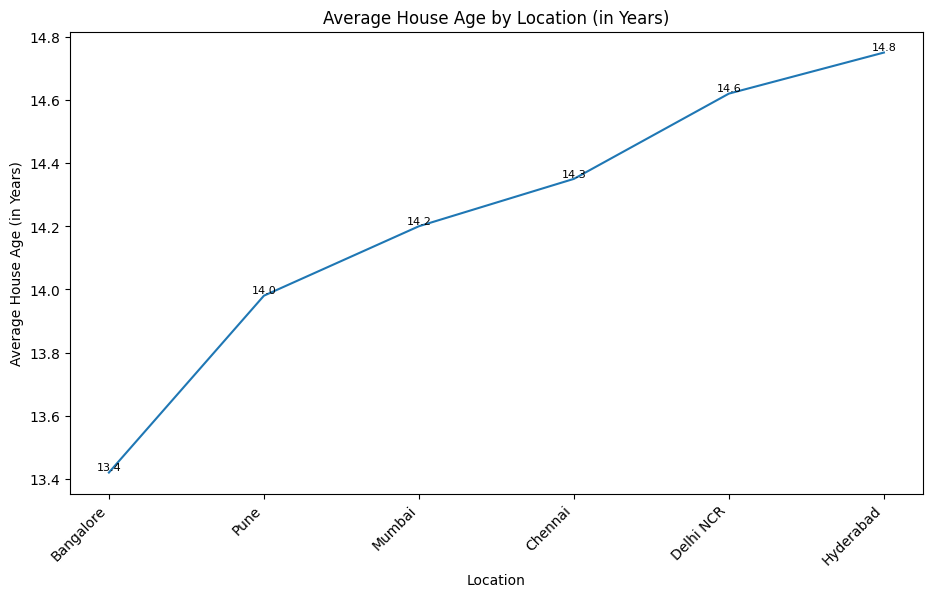

In [33]:
plt.figure(figsize=(11, 6))
    
line = plt.plot(avg_house_age)

for i in line:
    y_data = i.get_ydata()
    x_data = avg_house_age.index
    
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{y:,.1f}', ha='center', va='bottom', fontsize=8)

plt.title('Average House Age by Location (in Years)')
plt.xlabel('Location')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Average House Age (in Years)')
plt.show()

In [34]:
data_corr = df.select_dtypes('int64').corr()

data_corr

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,view_score,price
property_id,1.000000,-0.035640,0.055846,0.003800,-0.020322,-0.048627,-0.038293,0.015539,-0.018665
size_sqft,-0.035640,1.000000,0.026993,0.011297,0.001946,0.040277,-0.010991,-0.036452,0.781730
num_bedrooms,0.055846,0.026993,1.000000,-0.017872,-0.050872,-0.032684,-0.027936,0.031756,0.074613
num_bathrooms,0.003800,0.011297,-0.017872,1.000000,-0.003280,-0.005111,-0.034598,0.009429,0.014161
floor_number,-0.020322,0.001946,-0.050872,-0.003280,1.000000,0.022185,-0.002862,0.001206,0.015805
total_floors,-0.048627,0.040277,-0.032684,-0.005111,0.022185,1.000000,-0.003754,0.042599,0.037054
age_years,-0.038293,-0.010991,-0.027936,-0.034598,-0.002862,-0.003754,1.000000,0.017846,-0.017934
view_score,0.015539,-0.036452,0.031756,0.009429,0.001206,0.042599,0.017846,1.000000,-0.023916
price,-0.018665,0.781730,0.074613,0.014161,0.015805,0.037054,-0.017934,-0.023916,1.000000


<Axes: >

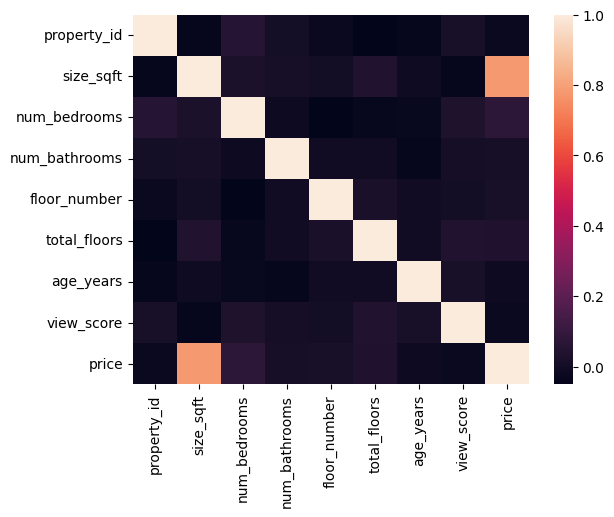

In [35]:
sns.heatmap(data_corr)

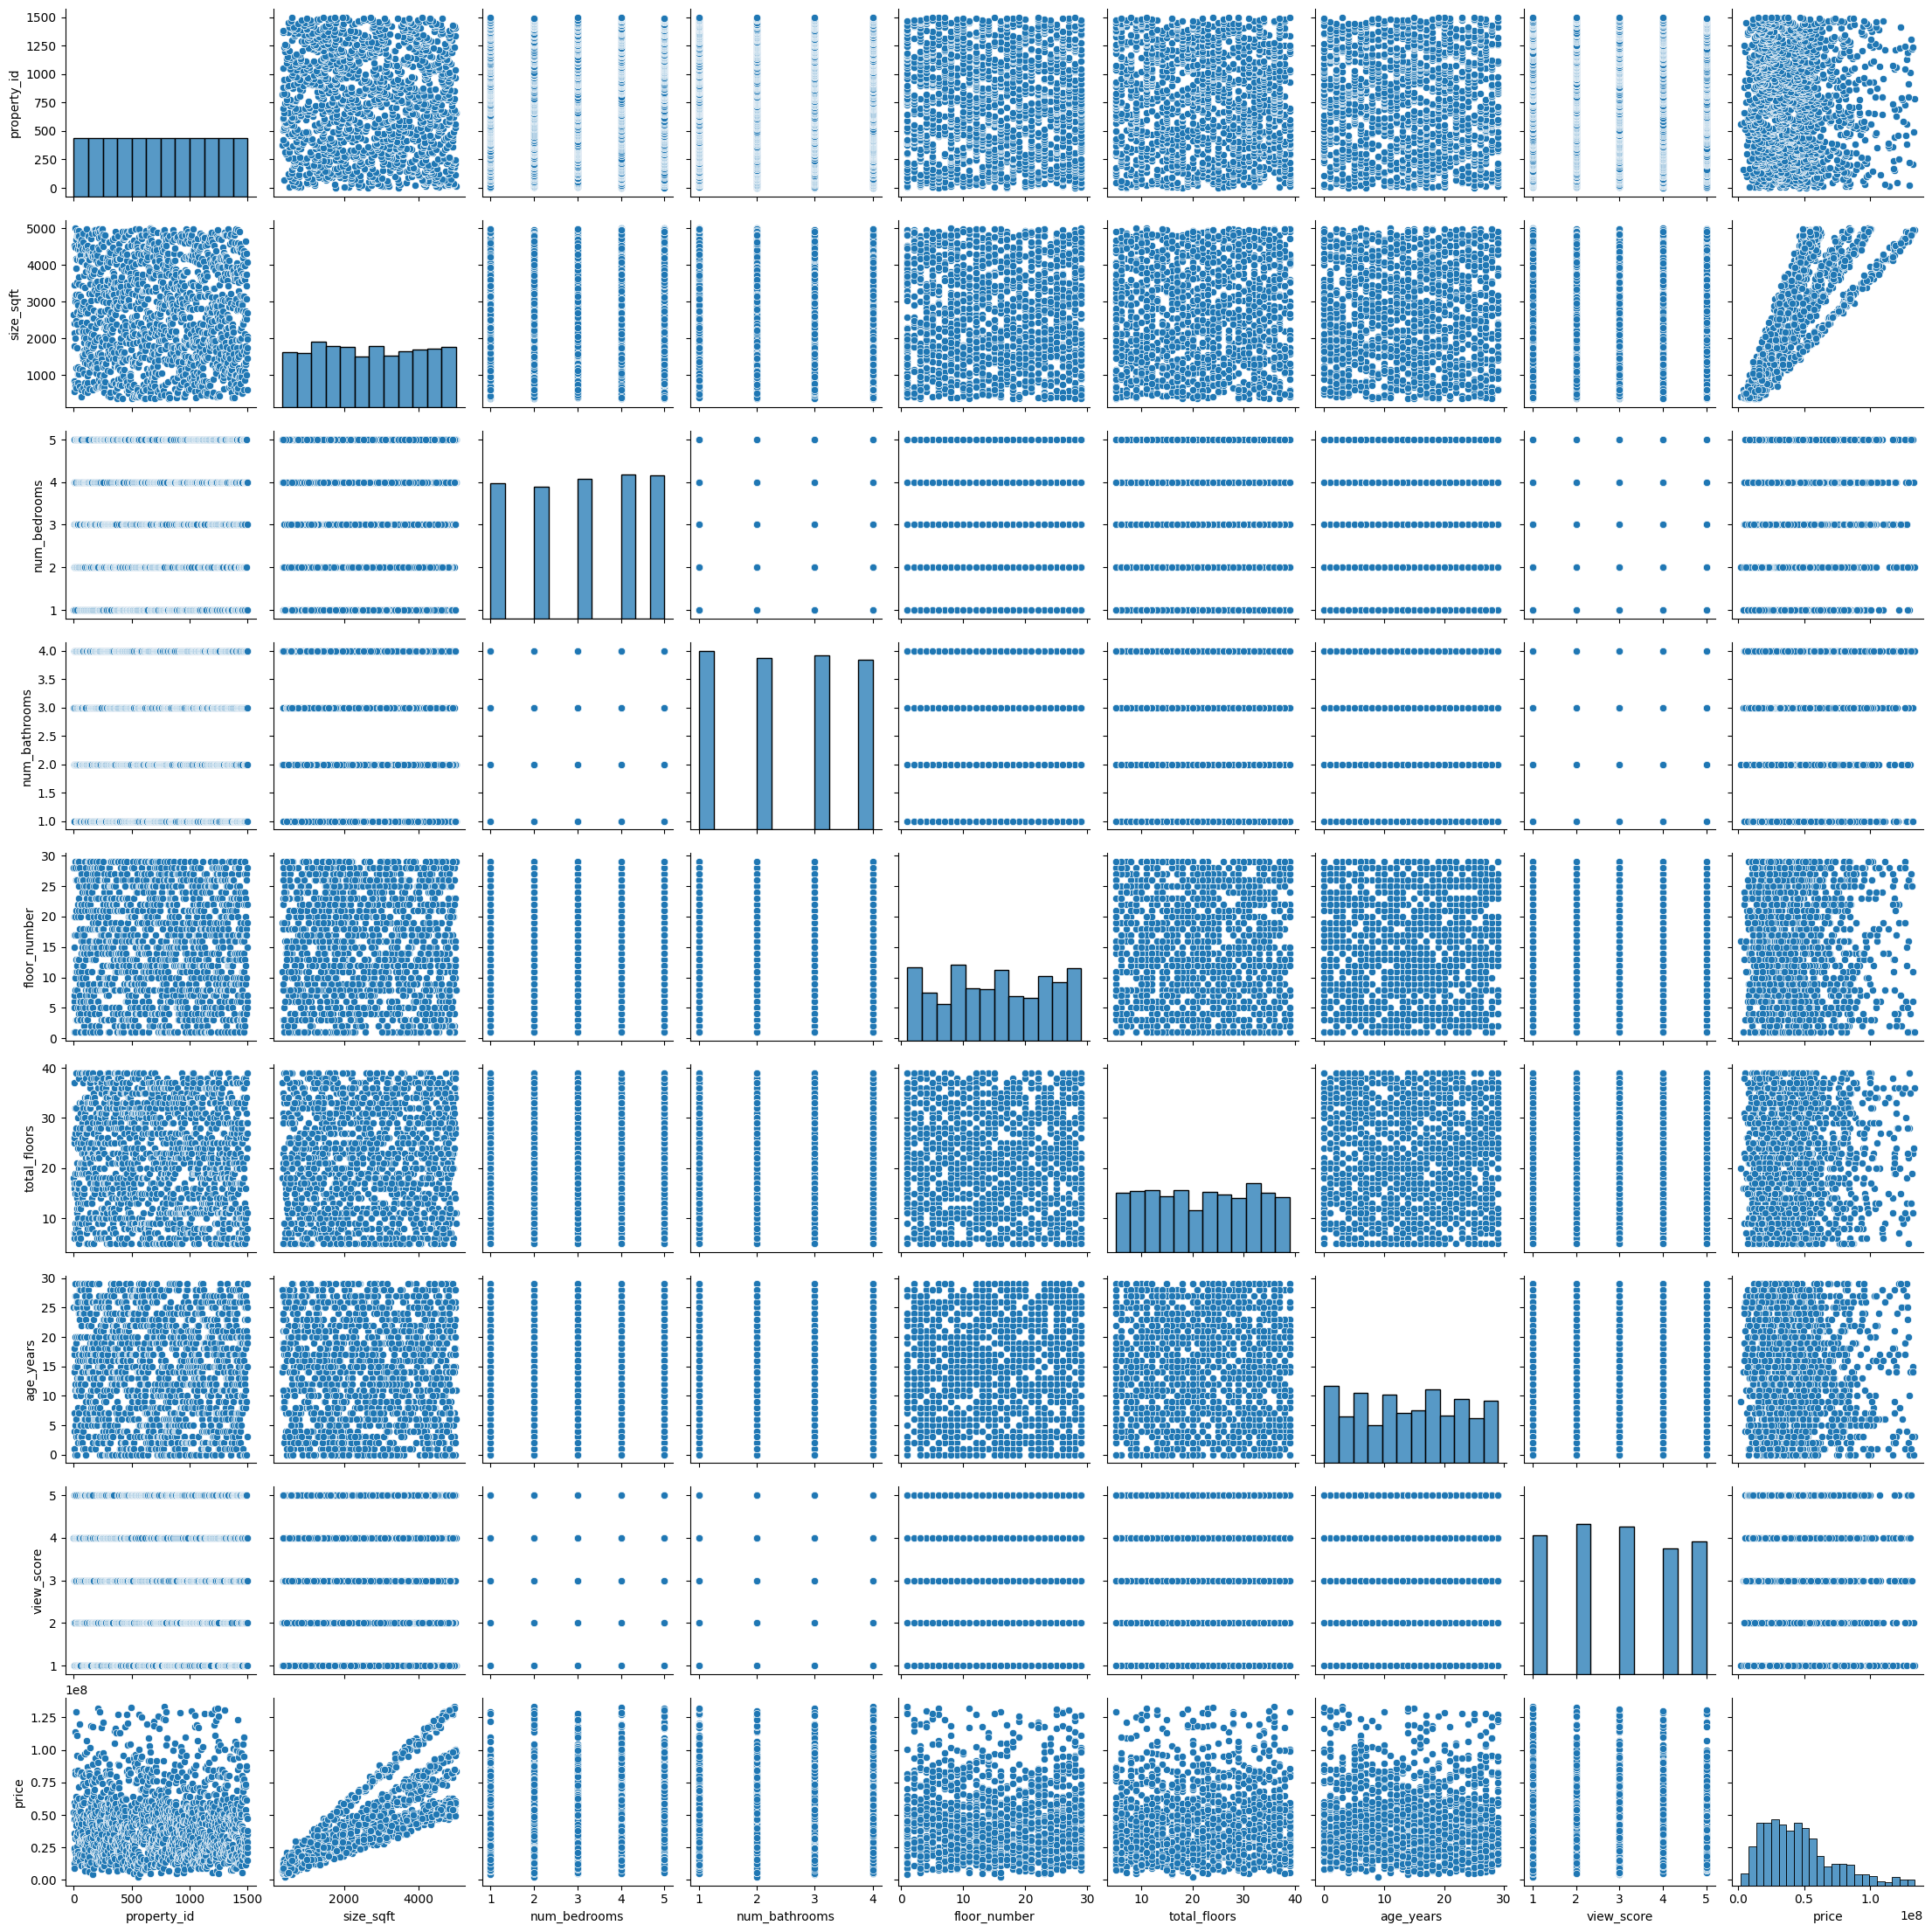

In [36]:
d1 = df.select_dtypes('int64')

sns.pairplot(data = d1)

In [37]:
df.drop_duplicates(inplace=True)

df.drop(df[df['zscore'] > 3].index, axis = 0, inplace = True)

df.reset_index(inplace = True)

df = df.drop(columns = ['index'])

df
df_final = df.copy()

In [38]:
df = pd.get_dummies(df, columns = ['location', 'property_type', 'furnishing', 'amenities'])

df

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,distance_to_metro_km,view_score,date_listed,price,zscore,price in crore,location_Bangalore,location_Chennai,location_Delhi NCR,location_Hyderabad,location_Mumbai,location_Pune,property_type_Apartment,property_type_Penthouse,property_type_Studio,property_type_Villa,furnishing_Fully Furnished,furnishing_Semi-Furnished,furnishing_Unfurnished,amenities_clubhouse,"amenities_clubhouse,garden","amenities_clubhouse,garden,gym","amenities_clubhouse,garden,gym,lift","amenities_clubhouse,garden,gym,lift,pool,parking","amenities_clubhouse,garden,gym,parking,lift","amenities_clubhouse,garden,gym,parking,security","amenities_clubhouse,garden,lift","amenities_clubhouse,garden,lift,parking,pool,gym,security","amenities_clubhouse,garden,lift,pool,gym,security","amenities_clubhouse,garden,lift,security,gym,pool","amenities_clubhouse,garden,parking,gym","amenities_clubhouse,garden,parking,gym,lift,pool,security","amenities_clubhouse,garden,pool,gym",...,"amenities_security,parking,lift,pool,clubhouse,gym","amenities_security,parking,pool","amenities_security,parking,pool,clubhouse","amenities_security,parking,pool,clubhouse,lift,gym","amenities_security,parking,pool,garden,lift,gym","amenities_security,parking,pool,lift,clubhouse,garden","amenities_security,parking,pool,lift,garden,gym","amenities_security,pool","amenities_security,pool,clubhouse","amenities_security,pool,clubhouse,gym,parking,garden,lift","amenities_security,pool,clubhouse,lift,gym","amenities_security,pool,garden,clubhouse","amenities_security,pool,garden,clubhouse,lift,gym,parking","amenities_security,pool,garden,gym,clubhouse,lift","amenities_security,pool,garden,gym,lift","amenities_security,pool,garden,gym,lift,parking,clubhouse","amenities_security,pool,garden,gym,parking,clubhouse,lift","amenities_security,pool,garden,gym,parking,lift","amenities_security,pool,garden,parking,gym,lift,clubhouse","amenities_security,pool,gym","amenities_security,pool,gym,clubhouse","amenities_security,pool,gym,clubhouse,parking,garden,lift","amenities_security,pool,gym,lift,parking","amenities_security,pool,gym,parking,garden,lift,clubhouse","amenities_security,pool,lift","amenities_security,pool,lift,clubhouse,garden,gym","amenities_security,pool,lift,clubhouse,garden,gym,parking","amenities_security,pool,lift,clubhouse,garden,parking,gym","amenities_security,pool,lift,clubhouse,parking","amenities_security,pool,lift,garden,parking","amenities_security,pool,lift,gym","amenities_security,pool,parking","amenities_security,pool,parking,clubhouse","amenities_security,pool,parking,clubhouse,gym","amenities_security,pool,parking,clubhouse,gym,lift","amenities_security,pool,parking,garden","amenities_security,pool,parking,garden,gym,clubhouse,lift","amenities_security,pool,parking,garden,lift,clubhouse","amenities_security,pool,parking,garden,lift,gym,clubhouse","amenities_security,pool,parking,gym"
0,1,2636,1,3,28,18,25,1.36,4,01-01-2020,51687000,0.221010,5.1687,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,3461,4,4,17,7,7,7.70,4,02-01-2020,46438000,0.028019,4.6438,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1783,5,2,6,25,4,1.75,5,03-01-2020,23251000,-0.824503,2.3251,False,False,False,False,False,Tru

In [39]:
# pd.set_option('display.max_rows', None)

In [40]:
df.shape

(1485, 1015)

In [41]:
set(map(lambda x: (x[len(x)-4:]),df_final["date_listed"]))

{'2020', '2021', '2022', '2023', '2024'}

In [42]:
df_final["year"] = pd.to_datetime(df["date_listed"],format=r"%d-%m-%Y").dt.year

In [43]:
df_final["Quarter"] = pd.to_datetime(df["date_listed"],format=r"%d-%m-%Y").dt.quarter

In [44]:
df_final.columns

Index(['property_id', 'location', 'property_type', 'size_sqft', 'num_bedrooms',
       'num_bathrooms', 'floor_number', 'total_floors', 'age_years',
       'furnishing', 'amenities', 'distance_to_metro_km', 'view_score',
       'date_listed', 'price', 'zscore', 'price in crore', 'year', 'Quarter'],
      dtype='object')

In [45]:
df_final.describe()

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,distance_to_metro_km,view_score,price,zscore,price in crore,year,Quarter
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1485.000000,1485.000000,1485.000000
mean,749.813468,2653.949495,3.038384,2.479461,15.089562,21.874074,14.242424,5.151616,2.945455,4.482373e+07,-0.031333,4.482373,2021.560943,2.472727
std,433.331683,1333.399282,1.414883,1.118523,8.394224,10.090075,8.560106,2.822422,1.397577,2.598079e+07,0.955242,2.598079,1.173533,1.129769
min,1.000000,351.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.110000,1.000000,2.384000e+06,-1.591725,0.238400,2020.000000,1.000000
25%,375.000000,1498.000000,2.000000,1.000000,8.000000,13.000000,7.000000,2.750000,2.000000,2.480900e+07,-0.767220,2.480900,2021.000000,1.000000
50%,748.000000,2636.000000,3.000000,2.000000,15.000000,22.000000,14.000000,5.240000,3.000000,4.095400e+07,-0.173613,4.095400,2022.000000,2.000000
75%,1123.000000,3816.000000,4.000000,3.000000,22.000000,31.000000,21.000000,7.590000,4.000000,5.808200e+07,0.456137,5.808200,2023.000000,3.000000
max,1500.000000,4997.000000,5.000000,4.000000,29.000000,39.000000,29.000000,10.000000,5.000000,1.271710e+08,2.996349,12.717100,2024.000000,4.000000


In [46]:
df_final.dtypes

property_id               int64
location                 object
property_type            object
size_sqft                 int64
num_bedrooms              int64
num_bathrooms             int64
floor_number              int64
total_floors              int64
age_years                 int64
furnishing               object
amenities                object
distance_to_metro_km    float64
view_score                int64
date_listed              object
price                     int64
zscore                  float64
price in crore          float64
year                      int32
Quarter                   int32
dtype: object

In [47]:
m=[]
amenities = []
def find_max(x):
    global m,amenities
    da = x.split(',')
    amenities.append(da)
    for am in da:
        if am not in m:
            m.append(am)
    return x.split(',')
list(map(find_max,df_final["amenities"]))
print(m)

['pool', 'lift', 'garden', 'gym', 'parking', 'clubhouse', 'security']


In [48]:
for col in m:
    df_final[col]= list(map(lambda x : 1 if col in x else 0,amenities))


In [49]:
df_final.head()

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore,price in crore,year,Quarter,pool,lift,garden,gym,parking,clubhouse,security
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000,0.221010,5.1687,2020,1,1,1,1,0,0,0,0
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000,0.028019,4.6438,2020,1,0,1,0,0,0,0,0
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000,-0.824503,2.3251,2020,1,1,1,0,1,1,1,1
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000,-1.200081,1.3036,2020,1,1,1,1,1,1,1,1
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000,-0.364729,3.5756,2020,1,1,1,0,1,0,0,0


In [50]:
n = "raj"
exec(f"{n}=10")

In [51]:
raj

10

In [52]:
from sklearn.preprocessing import LabelEncoder
for i in ["furnishing","location","property_type"]:
    exec(f"{i}_encode = LabelEncoder()")
    exec(f'df_final["{i}"] = {i}_encode.fit_transform(df_final["{i}"])')

In [53]:
df_final.dtypes

property_id               int64
location                  int64
property_type             int64
size_sqft                 int64
num_bedrooms              int64
num_bathrooms             int64
floor_number              int64
total_floors              int64
age_years                 int64
furnishing                int64
amenities                object
distance_to_metro_km    float64
view_score                int64
date_listed              object
price                     int64
zscore                  float64
price in crore          float64
year                      int32
Quarter                   int32
pool                      int64
lift                      int64
garden                    int64
gym                       int64
parking                   int64
clubhouse                 int64
security                  int64
dtype: object

In [54]:
# data = df_final.select_dtypes(["int32",'int64','float64'])
X_data = df_final[['location', 'property_type', 'size_sqft', 'num_bedrooms',
       'num_bathrooms', 'floor_number', 'total_floors', 'age_years',
       'furnishing', 'distance_to_metro_km', 'view_score',
       'year', 'Quarter','pool', 'lift', 'garden', 'gym', 'parking', 'clubhouse', 'security']]
y = df_final["price in crore"]

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [56]:
X = sc.fit_transform(X_data)

In [57]:
X.shape

(1485, 20)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr =LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [59]:
X_train

array([[ 0.29990311,  1.1537285 , -0.65715093, ..., -1.13185953,
         0.85603084, -1.15379382],
       [-1.46738307, -0.61163659, -0.58287959, ..., -1.13185953,
         0.85603084, -1.15379382],
       [-0.28919228, -0.61163659,  0.73824999, ...,  0.88350186,
         0.85603084, -1.15379382],
       ...,
       [-1.46738307, -0.61163659,  0.74650236, ..., -1.13185953,
         0.85603084, -1.15379382],
       [ 0.29990311,  1.1537285 , -0.39757635, ..., -1.13185953,
        -1.16818221, -1.15379382],
       [-0.28919228, -0.61163659, -1.36235354, ...,  0.88350186,
         0.85603084,  0.86670597]], shape=(1188, 20))

In [60]:
X_train.shape

(1188, 20)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [62]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_pred = lr.predict(X_test)

In [64]:
X_test[:,0].shape

(297,)

In [65]:
df_check = {}

for i,col in enumerate(X_data.columns):
    df_check[col] = X_test[:,i] 

df_check["y_actual"] = y_test
df_check["y_pred"] = y_pred


In [66]:
df_check = pd.DataFrame(df_check)

In [67]:
df_check.head(20)

,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,distance_to_metro_km,view_score,year,Quarter,pool,lift,garden,gym,parking,clubhouse,security,y_actual,y_pred
123,0.299903,-0.611637,1.303162,-0.027138,0.465537,-0.844861,-1.276344,-0.963212,1.200871,-1.623839,0.754807,-1.330571,-0.418569,0.858395,0.826845,0.854850,-1.125689,0.883502,0.856031,0.866706,5.3052,7.242333
432,0.299903,-0.611637,-0.392325,-0.027138,1.359874,0.108497,0.210766,-1.547514,-0.008141,-0.525122,1.470572,-0.478156,-1.304004,0.858395,0.826845,-1.169795,0.888345,0.883502,0.856031,0.866706,2.9084,3.711900
1033,0.888998,-0.611637,-0.844705,1.386882,0.465537,-0.249012,0.706469,-0.262050,-1.217154,-0.234493,0.754807,0.374259,1.352300,0.858395,-1.209416,-1.169795,-1.125689,-1.131860,0.856031,-1.153794,4.1917,3.174820
529,-1.467383,2.036411,0.198095,1.386882,-1.323137,-1.321539,1.301313,0.555972,-1.217154,-0.365631,1.470572,-0.478156,-0.418569,0.858395,0.826845,0.854850,0.888345,0.883502,-1.168182,0.866706,5.3167,4.832121
1418,-0.289192,2.036411,0.105818,-0.027138,-0.428800,-0.725691,-0.582360,0.555972,-0.008141,0.903211,-1.392488,1.226674,1.352300,-1.164965,0.826845,0.854850,0.888345,0.883502,0.856031,0.866706,5.7650,4.502268
629,0.888998,0.271046,0.321880,-1.441158,1.359874,0.823515,-0.879782,-0.262050,-0.008141,-0.507400,0.754807,-0.478156,0.466866,-1.164965,0.826845,-1.169795,-1.125689,-1.131860,-1.168182,-1.153794,8.5387,5.411410
297,-1.467383,-0.611637,0.395401,-1.441158,0.465537,-0.725691,1.598735,-1.196933,1.200871,-1.404096,0.039042,-1.330571,1.352300,0.858395,0.826845,0.854850,-1.125689,-1.131860,-1.168182,0.866706,5.1919,5.358852
1476,1.478094,2.036411,-0.096740,1.386882,-1.323137,-0.606521,1.202173,0.555972,1.200871,-1.715990,-0.676723,2.079088,-1.304004,0.858395,-1.209416,-1.169795,0.888345,0.883502,0.856031,0.866706,3.1020,4.351283
67,-0.289192,-0.611637,-0.850707,0.679872,-0.428800,1.300193,-0.780641,0.205391,1.200871,-0.610184,0.754807,-1.330571,-1.304004,-1.164965,-1.209416,-1.169795,0.888345,0.883502,-1.168182,-1.153794,2.7183,2.783121
49,-0.878288,2.036411,-1.116283,-1.441158,-0.428800,-0.725691,-0.284938,0.205391,-1.217154,1.371052,-1.392488,-1.330571,-1.304004,0.858395,0.826845,0.854850,0.888345,0.883502,0.856031,0.866706,1.4217,1.615201


In [68]:
X.shape

(1485, 20)

In [69]:
lr.score(X_test,y_test)

0.5713067117474985

In [70]:
df_check["diff"] = df_check["y_pred"]-df_check["y_actual"]
df_check["Square_of_diff"] = df_check["diff"]**2


In [71]:
# mean Square Error
df_check["Square_of_diff"].mean()

np.float64(2.2534306936376893)

In [72]:
# root mean Square Error
np.sqrt(df_check["Square_of_diff"].mean())

np.float64(1.5011431289646198)

In [73]:
df_check["y_actual"].mean()

np.float64(4.187402693602693)

In [74]:
from sklearn.metrics import r2_score
r2_score(df_check["y_actual"],df_check["y_pred"])

0.5713067117474985

In [75]:
df_final.view_score.unique()

array([4, 5, 2, 1, 3])

In [76]:
print(furnishing_encode.inverse_transform(np.array(2).reshape(1)))
print(location_encode.inverse_transform(np.array(2).reshape(1)))
print(property_type_encode.inverse_transform(np.array(3).reshape(1)))

['Unfurnished']
['Delhi NCR']
['Villa']


In [77]:
X_data.columns

Index(['location', 'property_type', 'size_sqft', 'num_bedrooms',
       'num_bathrooms', 'floor_number', 'total_floors', 'age_years',
       'furnishing', 'distance_to_metro_km', 'view_score', 'year', 'Quarter',
       'pool', 'lift', 'garden', 'gym', 'parking', 'clubhouse', 'security'],
      dtype='object')

In [78]:
get_prediction = np.array([2,3,2000,3,2,1,1,10,2,20,3,2015,2,1,0,1,0,1,0,1])
get_prediction = sc.transform(get_prediction.reshape(1,20))

/Users/hp/ProjectAndCode/DataScience/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
lr.predict(get_prediction)

array([2.57344168])

## Lasso(L1) Regularization

In [91]:
from sklearn.linear_model import Lasso
max_score = -1
alpha  = 100
for i in range(1,50,1):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    result = l1.score(X_test,y_test)
    if max_score < result:
        max_score = result
        alpha = i
print(max_score,alpha)


0.4706785471912943 1


In [111]:
l1 = Lasso(alpha=0.001)
l1.fit(X_train,y_train)
result = l1.score(X_test,y_test)
l1.coef_

array([ 8.77163575e-02, -2.85122287e-02,  2.05124429e+00,  1.28447126e-01,
        1.84147547e-02,  7.52890895e-02,  2.54934053e-02, -2.17102491e-02,
       -4.59060757e-02, -1.03065182e-01,  7.41363809e-04, -7.30302475e-03,
        3.01630411e-02, -5.13247450e-02,  4.31999407e-02,  2.06792368e-02,
       -2.73552285e-02, -8.26543614e-02, -1.33346878e-02,  8.36689512e-03])

In [112]:
from sklearn.linear_model import Ridge
max_score = -1
alpha  = 100
for i in range(100,1000,50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    result = l2.score(X_test,y_test)
    if max_score < result:
        max_score = result
        alpha = i
print(max_score,alpha)
l2.coef_

0.5796362581045948 150


array([ 0.04012724, -0.0072352 ,  1.14823988,  0.08306622,  0.00569611,
        0.04350148,  0.03852377, -0.03169797, -0.01375669, -0.05848158,
       -0.01343109, -0.01150917,  0.03175353, -0.06468038,  0.0229672 ,
       -0.01819949, -0.03125509, -0.03738568, -0.02431397, -0.01643761])

In [113]:
X_train.shape

(1188, 20)